# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### 1. Is the distribution of body temperatures normal?
Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

### Normal Distribution : Describes a continuous variable whose PDF has as single summetric peak

__The 68-95-99.7 Rule__
### For a Normal distribution:

68% of observations from a population will fall within $\pm 1$ standard deviation of the population mean. <br>
95% of observations from a population will fall within $\pm 2$ standard deviations of the population mean.<br>
99.7% of observations from a population will fall within $\pm 3$ standard deviations of the population mean.<br>

98.24923076923078 0.7303577789050377


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


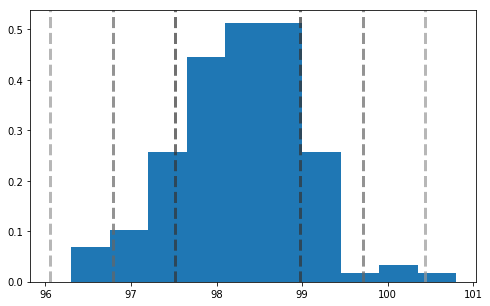

In [4]:
#Here is a set of points
xpoints = df.temperature

avg=np.mean(xpoints)
std=np.std(xpoints)

#check your values
print(avg,std)

#Define variables for 1,2,3 sigma
std1 = avg + std
std1_neg = avg - std
std2 = avg + 2*std
std2_neg = avg - 2*std
std3 = avg + 3*std
std3_neg = avg - 3*std

#Start Figure
#---------------------------------------
# Initialize a matplotlib "figure"
fig, ax = plt.subplots(figsize=(8,5))

# 68%:
ax.axvline(std1_neg, ls='dashed', lw=3, color='#333333', alpha=0.7)
ax.axvline(std1, ls='dashed', lw=3, color='#333333', alpha=0.7)

# 95%
ax.axvline(std2_neg, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(std2, ls='dashed', lw=3, color='#666666', alpha=0.7)

# 99.7%
ax.axvline(std3, ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(std3_neg, ls='dashed', lw=3, color='#999999', alpha=0.7)

# plot the lines using matplotlib's hist function:
ax.hist(xpoints,normed=True)
plt.show()

The mean and The median of normally distributed are equal.

### QQ plot

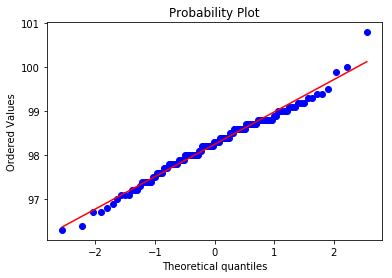

In [5]:
stats.probplot(df.temperature, dist="norm", plot=plt)
plt.show()

From the above two plots we get strong feelings about our data being normally distributed. 

D'Agostino K^2 Test

In [6]:
x = df.temperature

k2, p = stats.normaltest(x)
alpha = 1e-3

print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.258748
The null hypothesis cannot be rejected


The D'Agostino's Normality test evalutates the null hypothesis that a sample comes from normal distribution

Shapiro - Wilk test

In [7]:
stats.shapiro(df.temperature)

(0.9865770936012268, 0.233174666762352)

The Shapiro - Wilk test evaluates the null hypothesis that a sample comes from a normal distribution.
The Shapiro - Wilk test calculates the statistic called W. Which in our case is .98 
If null hypothesis is true than W should equals to 1
W < 1 may be significantly different from normal (p value determined from empirical distribution

### 2 Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

There are 130 Samples. It's Reasonable to assume that the observations are independent,

### 3. Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  t  or  z  statistic?
Now try using the other test. How is the result be different? Why?

It's best to use a one-sample test, since we are interested in comparing the sample mean of a single population with a known value. 
-As the sigma is unknown we should use T-test, despite the fact that our sample size is greater than 30.
(Some sources will indicate that using z-distribution is acceptable anytime sample size is >= 30)

## T - Test


In [8]:
t_result = stats.ttest_1samp(df.temperature, 98.6)
print(t_result)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


Since p > alpha for t statistic we should reject the null hypothesis.

## Z test


In [11]:
def z_stat(x, n_hyp):
    return (x.mean() - n_hyp) / (x.std() / np.sqrt(len(x)))
print((stats.norm.cdf(z_stat(df.temperature, 98.6))))


2.45107850705669e-08


Since p> a  for both the T-statistic and Z-statistic, we should reject the null hypothesis

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [42]:
import random
sample_10 = random.sample(df.temperature.tolist(), 10)
t_result = stats.ttest_1samp(sample_10, 98.6)
print(t_result)

Ttest_1sampResult(statistic=-2.393422143224471, pvalue=0.04033049025021918)


In [43]:
def z_stat(x, n_hyp):
    return (np.mean(x) - n_hyp) / (np.std(x) / np.sqrt(len(x)))
print((stats.norm.cdf(z_stat(sample_10, 98.6))))

0.005819765709656573


As p value is too low in both tests, we fail to rejec the null hypothese. We use Z test every time sigma is known to us, or anytime n > 30.

#### 5. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [46]:
mu, s, n = df.temperature.mean(), df.temperature.std(), len(df.temperature)
mean, sigma, n = np.mean(df.temperature), np.std(df.temperature), len(df.temperature)

sem = stats.sem(df.temperature)
CI = stats.norm.interval(0.90, mean, sem)
print('Sample mean: ', mean)
print('Sample Variance: ', sigma ** 2)
print('Margin of error: ', sem)
print('90% Confidence interval: ', CI)
stats.norm.interval(0.90, mean, sigma)

Sample mean:  98.24923076923078
Sample Variance:  0.5334224852071
Margin of error:  0.06430441683789102
90% Confidence interval:  (98.14345941596598, 98.35500212249558)


(97.04789912762661, 99.45056241083495)

Temperature can be considered abornmal >99.45 and <97.0

### 6. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.


In [49]:
male_temp = df.temperature[df.gender == 'M']
female_temp = df.temperature[df.gender == 'F']
print('Male_temp : ', np.mean(male_temp))
print('Female_temp :', np.mean(female_temp))

Male_temp :  98.1046153846154
Female_temp : 98.39384615384613


Two sample T-test

In [52]:
stats.ttest_ind(male_temp, female_temp)


Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

since p < a (0.05), we reject the null hypothesis that mean female temp and mean male temp are equal